In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import os
from matplotlib import pyplot

/Users/gforgam/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
bellyfat = pd.read_csv('goodBellyData.csv')
bellyfat = bellyfat.drop(bellyfat.loc[:,'Unnamed: 12':'Unnamed: 40'], axis=1)
bellyfat = bellyfat.rename(index=str, columns={"Units Sold": "Units_Sold", "Average Retail Price": "Average_Retail_Price", "Sales Rep": "Sales_Rep"})
bellyfat['Revenue'] = bellyfat.Units_Sold * bellyfat.Average_Retail_Price
bellyfat.columns
bellyfat.head(10)

,Date,Region,Store,Units_Sold,Average_Retail_Price,Sales_Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness,Revenue
0,5/4/10,FL,Biscayne (aka Aventura),150.702088,4.390000,0,0,0,0,0,1,0,661.582166
1,5/11/10,FL,Biscayne (aka Aventura),197.403797,3.997692,0,0,0,0,0,1,0,789.159643
2,5/18/10,FL,Biscayne (aka Aventura),235.106171,3.809231,0,0,0,0,0,1,0,895.573662
3,5/25/10,FL,Biscayne (aka Aventura),226.692427,3.835000,0,0,0,0,0,1,0,869.365459
4,6/1/10,FL,Biscayne (aka Aventura),257.688151,3.902500,0,0,0,0,0,1,0,1005.628008
5,6/8/10,FL,Biscayne (aka Aventura),132.957190,4.497692,0,0,0,0,0,1,0,598.000530
6,6/15/10,FL,Biscayne (aka Aventura),221.889969,4.116667,0,0,0,0,0,1,0,913.447037
7,6/22/10,FL,Biscayne (aka Aventura),245.881356,4.116667,0,0,0,0,0,1,0,1012.211584
8,6/29/10,FL,Biscayne (aka Aventura),156.102535,4.116667,0,0,0,0,0,4,0,642.622102
9,7/6/10,FL,Biscayne (aka Aventura),200.103966,3.747333,0,0,0,0,0,1,0,749.856262


In [189]:
bellyfat.describe()

,Units_Sold,Average_Retail_Price,Sales_Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness,Revenue
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,253.820718,4.107093,0.549784,0.038240,0.058442,0.156566,0.075758,1.448773,2.476190,1041.496594
std,110.998731,0.463828,0.497695,0.191843,0.234661,0.363522,0.264705,0.975092,1.592789,463.936494
min,47.559852,2.889286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,204.235593
25%,189.995471,3.775714,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,762.501799
50%,236.735266,4.096667,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,967.285506
75%,295.804391,4.425067,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1220.790197
max,1041.200256,6.251538,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,4251.771869


In [190]:
bellyfat.count()

Date                    1386
Region                  1243
Store                   1386
Units_Sold              1386
Average_Retail_Price    1386
Sales_Rep               1386
Endcap                  1386
Demo                    1386
Demo1-3                 1386
Demo4-5                 1386
Natural                 1386
Fitness                 1386
Revenue                 1386
dtype: int64

In [193]:
bellyfat.corr()

,Units_Sold,Average_Retail_Price,Sales_Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness,Revenue
Units_Sold,1.000000,-0.018829,0.449440,0.593216,0.329358,0.384602,0.198331,0.062784,-0.031772,0.955887
Average_Retail_Price,-0.018829,1.000000,0.328900,-0.067294,0.051664,-0.015098,0.087936,-0.004812,0.071175,0.248508
Sales_Rep,0.449440,0.328900,1.000000,0.051887,0.151264,0.242227,0.138508,0.089319,0.057511,0.517026
Endcap,0.593216,-0.067294,0.051887,1.000000,0.078630,0.090093,-0.000215,0.081884,-0.059635,0.537599
Demo,0.329358,0.051664,0.151264,0.078630,1.000000,0.036549,-0.013209,-0.001106,0.006623,0.338761
Demo1-3,0.384602,-0.015098,0.242227,0.090093,0.036549,1.000000,0.011710,-0.004856,0.008313,0.364772
Demo4-5,0.198331,0.087936,0.138508,-0.000215,-0.013209,0.011710,1.000000,0.013648,-0.011987,0.225128
Natural,0.062784,-0.004812,0.089319,0.081884,-0.001106,-0.004856,0.013648,1.000000,-0.085628,0.066464
Fitness,-0.031772,0.071175,0.057511,-0.059635,0.006623,0.008313,-0.011987,-0.085628,1.000000,-0.011211
Revenue,0.955887,0.248508,0.517026,0.537599,0.338761,0.364772,0.225128,0.066464,-0.011211,1.000000


In [170]:
bellyfat.groupby('Region').mean()

,Units_Sold,Average_Retail_Price,Sales_Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness,Revenue
Region,,,,,,,,,,
FL,188.485946,4.150241,0.000000,0.125000,0.000000,0.000000,0.022727,1.409091,2.500000,781.472654
MA,222.402508,3.613940,0.000000,0.028708,0.057416,0.167464,0.066986,1.578947,2.315789,802.058353
MW,282.524682,3.938973,1.000000,0.000000,0.096591,0.221591,0.056818,1.687500,3.625000,1110.583601
NC,312.360795,4.530285,1.000000,0.090909,0.054545,0.212121,0.151515,1.800000,2.400000,1414.332282
NE,254.374302,4.160218,0.727273,0.000000,0.054545,0.172727,0.100000,1.490909,2.100000,1047.126171
PN,343.800961,4.052436,1.000000,0.171717,0.080808,0.161616,0.040404,1.222222,1.444444,1343.680813
RM,302.390082,4.403689,1.000000,0.036364,0.145455,0.336364,0.136364,1.200000,2.400000,1306.363552
SO,192.162169,3.799549,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.857143,729.169011
SP,285.787919,4.400088,1.000000,0.000000,0.098485,0.272727,0.181818,1.500000,2.583333,1257.958500


In [192]:
group_region_sale= bellyfat.groupby(['Region','Sales_Rep']).mean()
group_region_sale

Units_Sold  Average_Retail_Price    Endcap      Demo  \
Region Sales_Rep                                                         
FL     0          188.485946              4.150241  0.125000  0.000000   
MA     0          222.402508              3.613940  0.028708  0.057416   
MW     1          282.524682              3.938973  0.000000  0.096591   
NC     1          312.360795              4.530285  0.090909  0.054545   
NE     0          215.640080              4.334262  0.000000  0.000000   
       1          268.899635              4.094952  0.000000  0.075000   
PN     1          343.800961              4.052436  0.171717  0.080808   
RM     1          302.390082              4.403689  0.036364  0.145455   
SO     0          192.162169              3.799549  0.000000  0.000000   
SP     1          285.787919              4.400088  0.000000  0.098485   
SW     0          178.359389              4.198320  0.000000  0.000000   

                   Demo1-3   Demo4-5   Natural   Fitness      Revenue  
Region Sales_Rep                                                       
FL     0          0.000000  0.022727  1.409091  2.500000   781.472654  
MA     0          0.167464  0.066986  1.578947  2.315789   802.058353  
MW     1          0.221591  0.056818  1.687500  3.625000  1110.583601  
NC     1          0.212121  0.151515  1.800000  2.400000  1414.332282  
NE     0          0.066667  0.200000  1.500000  2.100000   927.459442  
       1          0.212500  0.062500  1.487500  2.100000  1092.001194  
PN     1          0.161616  0.040404  1.222222  1.444444  1343.680813  
RM     1          0.336364  0.136364  1.200000  2.400000  1306.363552  
SO     0          0.000000  0.000000  1.000000  2.857143   729.169011  
SP     1          0.272727  0.181818  1.500000  2.583333  1257.958500  
SW     0          0.000000  0.000000  0.857143  2.428571   746.808760

In [182]:
group_region_endcap=bellyfat.groupby(['Region','Endcap']).mean()
group_region_endcap
# group_region_sale['Revenue'].plot.bar()

Units_Sold  Average_Retail_Price  Sales_Rep      Demo  \
Region Endcap                                                          
FL     0       188.572876              4.135485   0.000000  0.000000   
       1       187.877438              4.253538   0.000000  0.000000   
MA     0       220.934086              3.618815   0.000000  0.054187   
       1       272.084117              3.449028   0.000000  0.166667   
MW     0       282.524682              3.938973   1.000000  0.096591   
NC     0       271.093756              4.534059   1.000000  0.053333   
       1       725.031184              4.492546   1.000000  0.066667   
NE     0       254.374302              4.160218   0.727273  0.054545   
PN     0       254.098526              4.163067   1.000000  0.036585   
       1       776.483296              3.518802   1.000000  0.294118   
RM     0       283.865344              4.431264   1.000000  0.141509   
       1       793.295634              3.672931   1.000000  0.250000   
SO     0       192.162169              3.799549   0.000000  0.000000   
SP     0       285.787919              4.400088   1.000000  0.098485   
SW     0       178.359389              4.198320   0.000000  0.000000   

                Demo1-3   Demo4-5   Natural   Fitness      Revenue  
Region Endcap                                                       
FL     0       0.000000  0.025974  1.402597  2.558442   779.456750  
       1       0.000000  0.000000  1.454545  2.090909   795.583980  
MA     0       0.157635  0.059113  1.536946  2.295567   798.158277  
       1       0.500000  0.333333  3.000000  3.000000   934.010918  
MW     0       0.221591  0.056818  1.687500  3.625000  1110.583601  
NC     0       0.213333  0.160000  1.780000  2.440000  1230.410859  
       1       0.200000  0.066667  2.000000  2.000000  3253.546507  
NE     0       0.172727  0.100000  1.490909  2.100000  1047.126171  
PN     0       0.085366  0.048780  1.109756  1.365854  1055.330927  
       1       0.529412  0.000000  1.764706  1.823529  2734.544965  
RM     0       0.330189  0.132075  1.207547  2.452830  1244.124305  
       1       0.500000  0.250000  1.000000  1.000000  2955.703588  
SO     0       0.000000  0.000000  1.000000  2.857143   729.169011  
SP     0       0.272727  0.181818  1.500000  2.583333  1257.958500  
SW     0       0.000000  0.000000  0.857143  2.428571   746.808760

In [181]:
group_region_end_sale=bellyfat.groupby(['Region','Endcap','Sales_Rep']).mean()
group_region_end_sale

Units_Sold  Average_Retail_Price      Demo   Demo1-3  \
Region Endcap Sales_Rep                                                         
FL     0      0          188.572876              4.135485  0.000000  0.000000   
       1      0          187.877438              4.253538  0.000000  0.000000   
MA     0      0          220.934086              3.618815  0.054187  0.157635   
       1      0          272.084117              3.449028  0.166667  0.500000   
MW     0      1          282.524682              3.938973  0.096591  0.221591   
NC     0      1          271.093756              4.534059  0.053333  0.213333   
       1      1          725.031184              4.492546  0.066667  0.200000   
NE     0      0          215.640080              4.334262  0.000000  0.066667   
              1          268.899635              4.094952  0.075000  0.212500   
PN     0      1          254.098526              4.163067  0.036585  0.085366   
       1      1          776.483296              3.518802  0.294118  0.529412   
RM     0      1          283.865344              4.431264  0.141509  0.330189   
       1      1          793.295634              3.672931  0.250000  0.500000   
SO     0      0          192.162169              3.799549  0.000000  0.000000   
SP     0      1          285.787919              4.400088  0.098485  0.272727   
SW     0      0          178.359389              4.198320  0.000000  0.000000   

                          Demo4-5   Natural   Fitness      Revenue  
Region Endcap Sales_Rep                                             
FL     0      0          0.025974  1.402597  2.558442   779.456750  
       1      0          0.000000  1.454545  2.090909   795.583980  
MA     0      0          0.059113  1.536946  2.295567   798.158277  
       1      0          0.333333  3.000000  3.000000   934.010918  
MW     0      1          0.056818  1.687500  3.625000  1110.583601  
NC     0      1          0.160000  1.780000  2.440000  1230.410859  
       1      1          0.066667  2.000000  2.000000  3253.546507  
NE     0      0          0.200000  1.500000  2.100000   927.459442  
              1          0.062500  1.487500  2.100000  1092.001194  
PN     0      1          0.048780  1.109756  1.365854  1055.330927  
       1      1          0.000000  1.764706  1.823529  2734.544965  
RM     0      1          0.132075  1.207547  2.452830  1244.124305  
       1      1          0.250000  1.000000  1.000000  2955.703588  
SO     0      0          0.000000  1.000000  2.857143   729.169011  
SP     0      1          0.181818  1.500000  2.583333  1257.958500  
SW     0      0          0.000000  0.857143  2.428571   746.808760

In [194]:
group_region_end_sale_demo=bellyfat.groupby(['Region','Endcap','Sales_Rep','Demo']).mean()
group_region_end_sale_demo

Units_Sold  Average_Retail_Price   Demo1-3  \
Region Endcap Sales_Rep Demo                                                
FL     0      0         0      188.572876              4.135485  0.000000   
       1      0         0      187.877438              4.253538  0.000000   
MA     0      0         0      216.030356              3.613059  0.166667   
                        1      306.526454              3.719285  0.000000   
       1      0         0      267.796573              3.434167  0.600000   
                        1      293.521834              3.523333  0.000000   
MW     0      1         0      273.004876              3.919983  0.213836   
                        1      371.562869              4.116589  0.294118   
NC     0      1         0      265.526494              4.528769  0.204225   
                        1      369.912661              4.627960  0.375000   
       1      1         0      720.210822              4.494038  0.214286   
                        1      792.516251              4.471667  0.000000   
NE     0      0         0      215.640080              4.334262  0.066667   
              1         0      262.463312              4.096431  0.229730   
                        1      348.280949              4.076712  0.000000   
PN     0      1         0      250.611221              4.158541  0.075949   
                        1      345.930892              4.282262  0.333333   
       1      1         0      743.389144              3.401092  0.583333   
                        1      855.909262              3.801306  0.400000   
RM     0      1         0      268.040857              4.453506  0.340659   
                        1      379.867232              4.296331  0.266667   
       1      1         0      710.660760              3.536065  0.333333   
                        1     1041.200256              4.083529  1.000000   
SO     0      0         0      192.162169              3.799549  0.000000   
SP     0      1         0      278.678940              4.379022  0.294118   
                        1      350.862413              4.592914  0.076923   
SW     0      0         0      178.359389              4.198320  0.000000   

                               Demo4-5   Natural   Fitness      Revenue  
Region Endcap Sales_Rep Demo                                             
FL     0      0         0     0.025974  1.402597  2.558442   779.456750  
       1      0         0     0.000000  1.454545  2.090909   795.583980  
MA     0      0         0     0.062500  1.562500  2.296875   778.415349  
                        1     0.000000  1.090909  2.272727  1142.762106  
       1      0         0     0.400000  3.000000  3.000000   913.978049  
                        1     0.000000  3.000000  3.000000  1034.175262  
MW     0      1         0     0.062893  1.672956  3.660377  1065.858588  
                        1     0.000000  1.823529  3.294118  1528.894015  
NC     0      1         0     0.161972  1.809859  2.471831  1203.352387  
                        1     0.125000  1.250000  1.875000  1710.698754  
       1      1         0     0.071429  1.928571  1.857143  3232.809222  
                        1     0.000000  3.000000  4.000000  3543.868504  
NE     0      0         0     0.200000  1.500000  2.100000   927.459442  
              1         0     0.067568  1.513514  2.108108  1065.444261  
                        1     0.000000  1.166667  2.000000  1419.536700  
PN     0      1         0     0.050633  1.113924  1.417722  1039.284636  
                        1     0.000000  1.000000  0.000000  1477.883275  
       1      1         0     0.000000  1.583333  1.583333  2525.959737  
                        1     0.000000  2.200000  2.400000  3235.149513  
RM     0      1         0     0.120879  1.241758  2.395604  1181.331634  
                        1     0.200000  1.000000  2.800000  1625.066508  
       1      1         0     0.000000  1.000000  0.666667  2523.680827  
                     

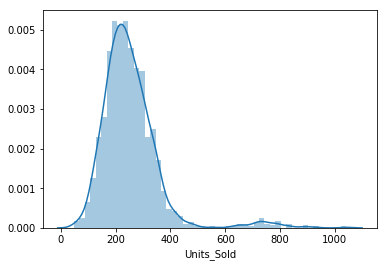

In [33]:
sns.distplot(bellyfat.Units_Sold)

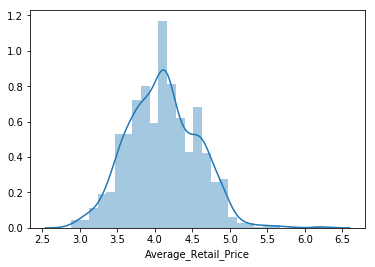

In [32]:
sns.distplot(bellyfat.Average_Retail_Price)

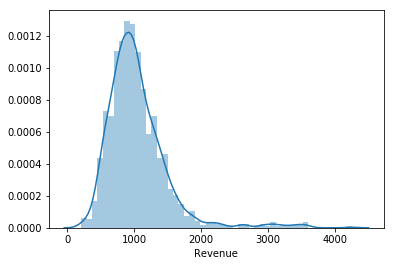

In [41]:
sns.distplot(bellyfat.Revenue)

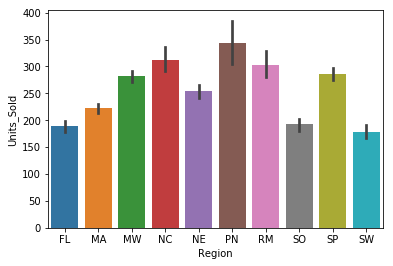

In [162]:
sns.barplot(x="Region", y="Units_Sold", data=bellyfat)

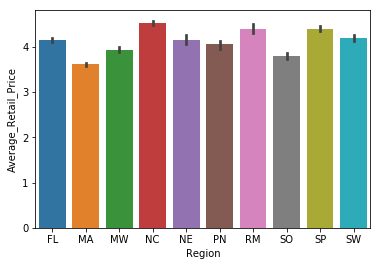

In [164]:
sns.barplot(x="Region", y="Average_Retail_Price", data=bellyfat)

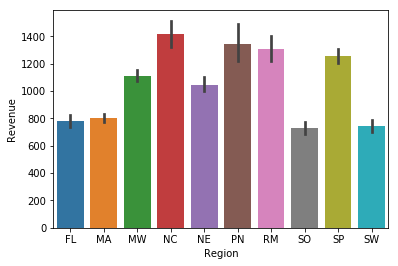

In [165]:
sns.barplot(x="Region", y="Revenue", data=bellyfat)

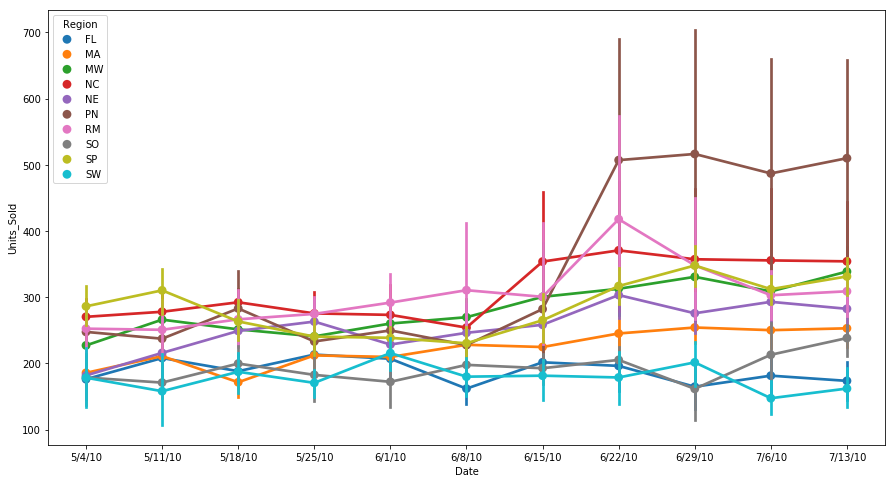

In [166]:
pyplot.figure(figsize=(15, 8))
sns.pointplot(x="Date", y="Units_Sold", hue="Region", data=bellyfat);

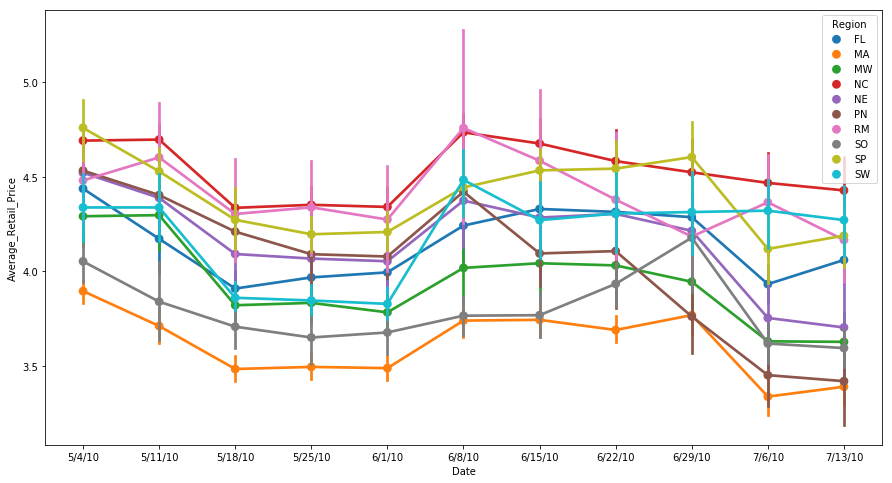

In [167]:
pyplot.figure(figsize=(15, 8))
sns.pointplot(x="Date", y="Average_Retail_Price", hue="Region", data=bellyfat);

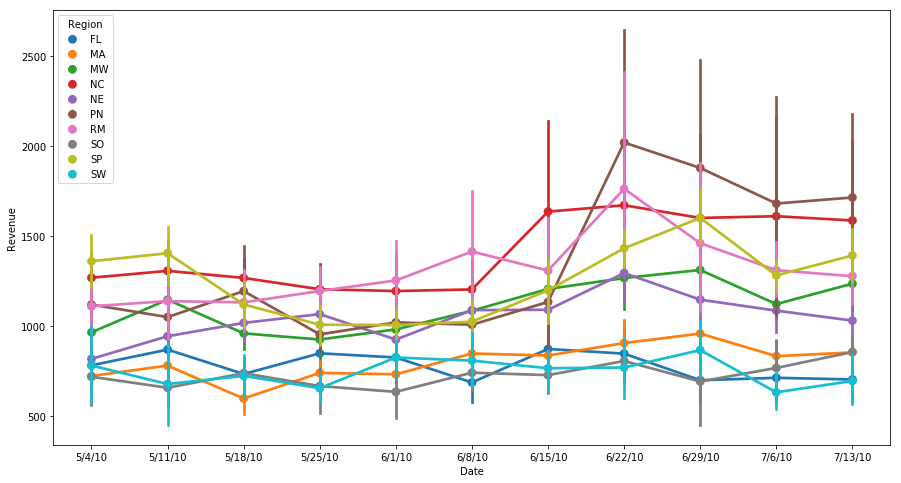

In [168]:
pyplot.figure(figsize=(15, 8))
sns.pointplot(x="Date", y="Revenue", hue="Region", data=bellyfat);

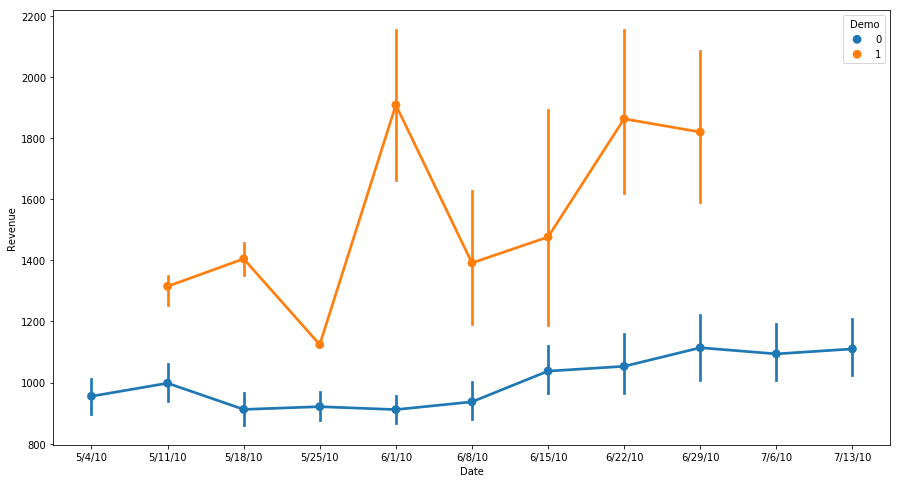

In [14]:
pyplot.figure(figsize=(15, 8))
sns.pointplot(x="Date", y="Revenue", hue="Demo", data=bellyfat);

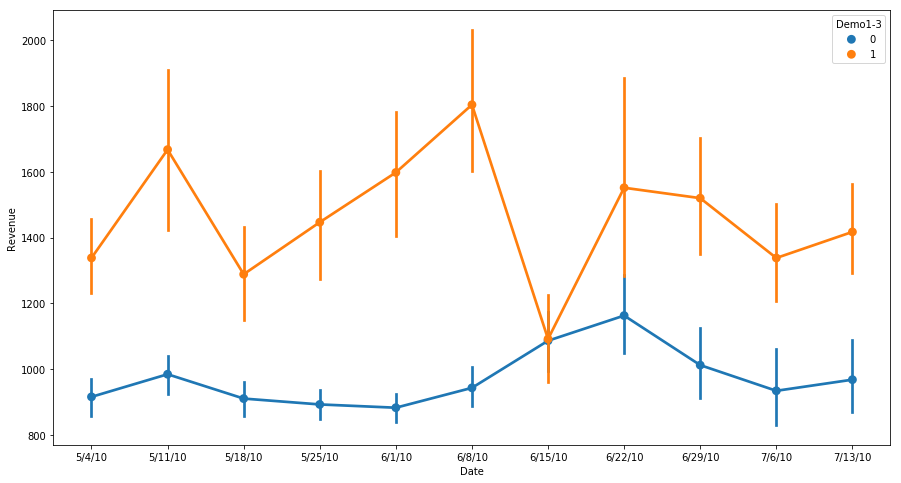

In [13]:
pyplot.figure(figsize=(15, 8))
sns.pointplot(x="Date", y="Revenue", hue="Demo1-3", data=bellyfat);

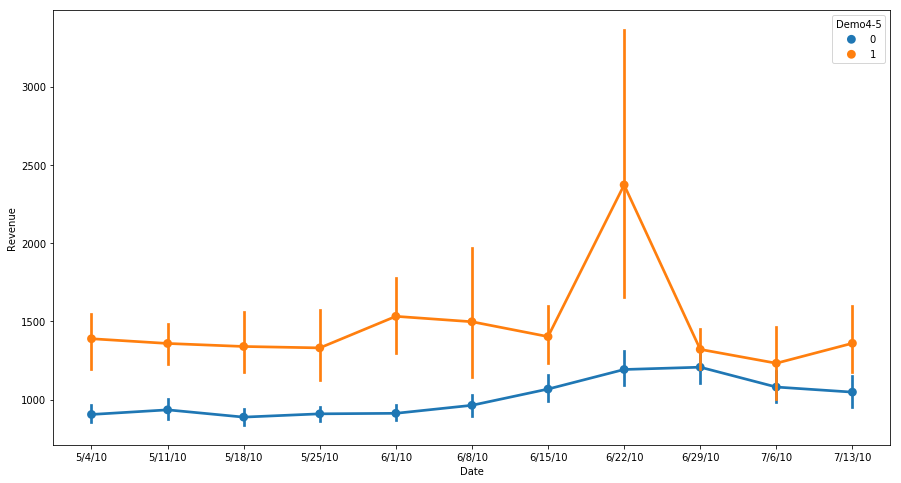

In [8]:
pyplot.figure(figsize=(15, 8))
sns.pointplot(x="Date", y="Revenue", hue="Demo4-5", data=bellyfat);

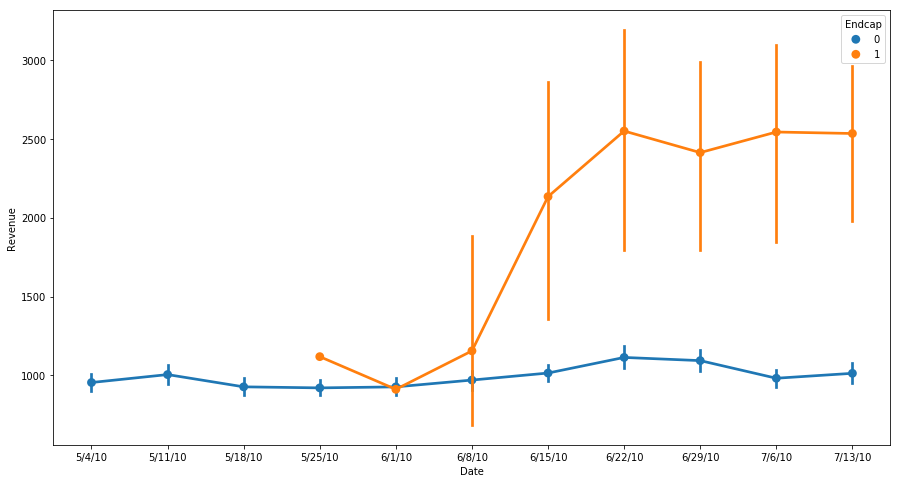

In [15]:
pyplot.figure(figsize=(15, 8))
sns.pointplot(x="Date", y="Revenue", hue="Endcap", data=bellyfat);

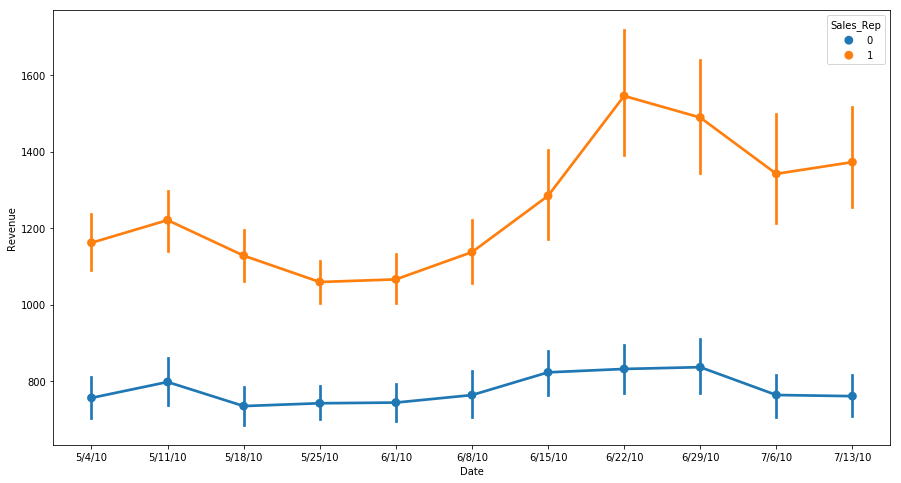

In [42]:
pyplot.figure(figsize=(15, 8))
sns.pointplot(x="Date", y="Revenue", hue="Sales_Rep", data=bellyfat);

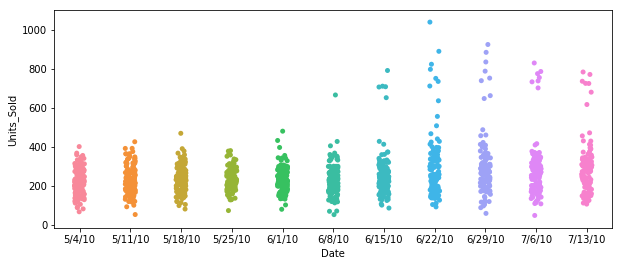

In [58]:
pyplot.figure(figsize=(10, 4))
sns.stripplot(x="Date", y="Units_Sold", data=bellyfat, jitter=True);

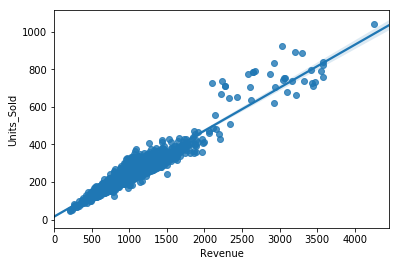

In [68]:
sns.regplot(x="Revenue", y="Units_Sold", data=bellyfat);

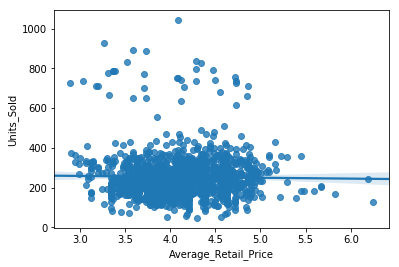

In [70]:
sns.regplot(x="Average_Retail_Price", y="Units_Sold", data=bellyfat);

In [17]:
group_by_demos = bellyfat.groupby(['Demo','Demo1-3','Demo4-5','Endcap'])
group_by_demos.aggregate([np.size,np.mean,np.std])

Units_Sold                           \
                                  size         mean         std   
Demo Demo1-3 Demo4-5 Endcap                                       
0    0       0       0           992.0   213.266235   57.025042   
                     1            28.0   497.784360  257.914184   
             1       0            82.0   304.878604   57.875426   
                     1             3.0   443.857858  244.680703   
     1       0       0           171.0   308.528740   47.383802   
                     1            14.0   662.264468  229.492822   
             1       0            15.0   366.304450   70.757519   
1    0       0       0            57.0   334.205160   55.509948   
                     1             5.0   710.737025  238.720982   
             1       0             2.0   394.855856   47.368099   
     1       0       0            12.0   427.500569   38.524012   
                     1             2.0   905.949634   28.486405   
             1       0             2.0   532.473301   34.049653   
                     1             1.0  1041.200256         NaN   

                            Average_Retail_Price                      \
                                            size      mean       std   
Demo Demo1-3 Demo4-5 Endcap                                            
0    0       0       0                     992.0  4.094379  0.439643   
                     1                      28.0  4.109369  0.526901   
             1       0                      82.0  4.251779  0.528590   
                     1                       3.0  3.706987  0.884623   
     1       0       0                     171.0  4.086311  0.518578   
                     1                      14.0  3.722448  0.473266   
             1       0                      15.0  4.309433  0.400049   
1    0       0       0                      57.0  4.193026  0.450178   
                     1                       5.0  4.001092  0.429425   
             1       0                       2.0  4.628135  0.851951   
     1       0       0                      12.0  4.389091  0.504319   
                     1                       2.0  3.498036  0.324512   
             1       0                       2.0  4.224936  0.528064   
                     1                       1.0  4.083529       NaN   

                            Sales_Rep                     Natural            \
                                 size      mean       std    size      mean   
Demo Demo1-3 Demo4-5 Endcap                                                   
0    0       0       0            992  0.453629  0.498096     992  1.440524   
                     1             28  0.607143  0.497347      28  1.392857   
             1       0             82  0.756098  0.432077      82  1.536585   
                     1              3  0.333333  0.577350       3  3.000000   
     1       0       0            171  0.801170  0.400292     171  1.397661   
                     1             14  0.785714  0.425815      14  2.285714   
             1       0             15  1.000000  0.000000      15  1.133333   
1    0       0       0             57  0.807018  0.398147      57  1.368421   
                     1              5  0.800000  0.447214       5  2.400000   
             1       0              2  1.000000  0.000000       2  1.500000   
     1       0       0             12  1.000000  0.000000      12  1.416667   
                     1              2  1.000000  0.000000       2  2.500000   
             1       0              2  1.000000  0.000000       2  0.500000   
                     1              1  1.000000       NaN       1  1.000000   

                                      Fitness                     Revenue  \
                                  std    size      mean       std    size   
Demo Demo1-3 Demo4-5 Endcap                                                 
0    0       0       0       1.002767     992  2.507056  1.604720   992.0   
           

In [37]:
group_by = bellyfat.groupby(['Demo','Demo1-3','Demo4-5','Endcap','Sales_Rep'])
group_by.aggregate(np.mean)

Units_Sold  Average_Retail_Price  \
Demo Demo1-3 Demo4-5 Endcap Sales_Rep                                      
0    0       0       0      0           188.101324              3.964195   
                            1           243.575974              4.251178   
                     1      0           187.877438              4.253538   
                            1           698.312368              4.016084   
             1       0      0           271.614060              3.819908   
                            1           315.609102              4.391093   
                     1      0           302.601767              3.196250   
                            1           726.370038              4.728462   
     1       0       0      0           280.656256              3.655370   
                            1           315.445999              4.193260   
                     1      0           244.593111              3.592778   
                            1           776.174838              3.757813   
             1       0      1           366.304450              4.309433   
1    0       0       0      0           306.526454              3.719285   
                            1           340.823981              4.306312   
                     1      0           293.521834              3.523333   
                            1           815.040823              4.120531   
             1       0      1           394.855856              4.628135   
     1       0       0      1           427.500569              4.389091   
                     1      1           905.949634              3.498036   
             1       0      1           532.473301              4.224936   
                     1      1          1041.200256              4.083529   

                                        Natural   Fitness      Revenue  
Demo Demo1-3 Demo4-5 Endcap Sales_Rep                                   
0    0       0       0      0          1.350554  2.418819   742.242236  
                            1          1.548889  2.613333  1031.247320  
                     1      0          1.454545  2.090909   795.583980  
                            1          1.352941  0.764706  2799.093720  
             1       0      0          1.350000  1.450000  1034.698749  
                            1          1.596774  2.629032  1382.724742  
                     1      0          3.000000  3.000000   967.190899  
                            1          3.000000  4.000000  3434.612786  
     1       0       0      0          1.147059  2.235294  1018.723266  
                            1          1.459854  2.547445  1318.874373  
                     1      0          3.000000  3.000000   878.502816  
                            1          2.090909  2.727273  2920.243855  
             1       0      1          1.133333  2.600000  1567.259346  
1    0       0       0      0          1.090909  2.272727  1142.762106  
                            1          1.434783  2.565217  1461.109855  
                     1      0          3.000000  3.000000  1034.175262  
                            1          2.250000  2.750000  3347.692970  
             1       0      1          1.500000  3.000000  1807.268517  
     1       0       0      1          1.416667  2.500000  1879.785362  
                     1      1          2.500000  2.500000  3164.422094  
             1       0      1          0.500000  2.000000  2240.675372  
                     1      1          1.000000  2.000000  4251.771869

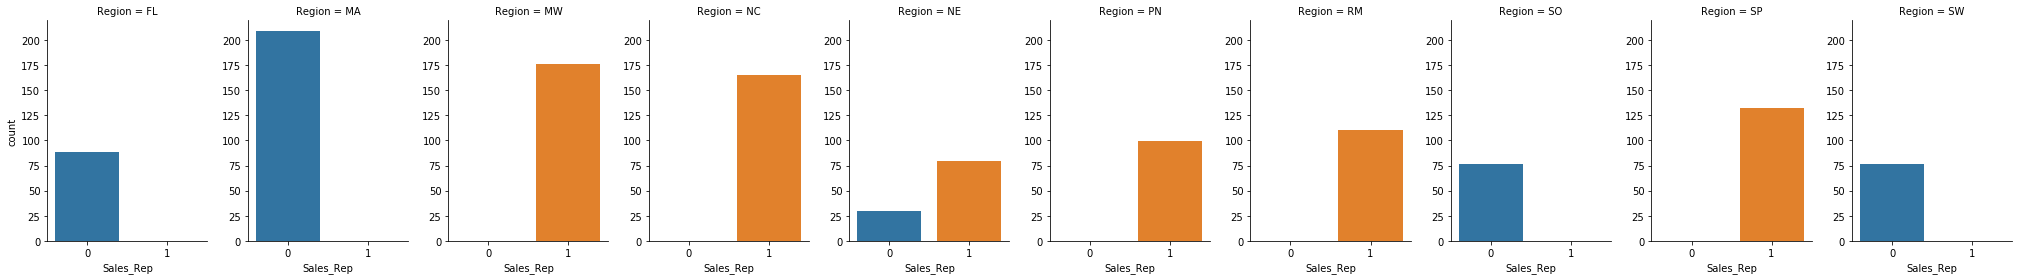

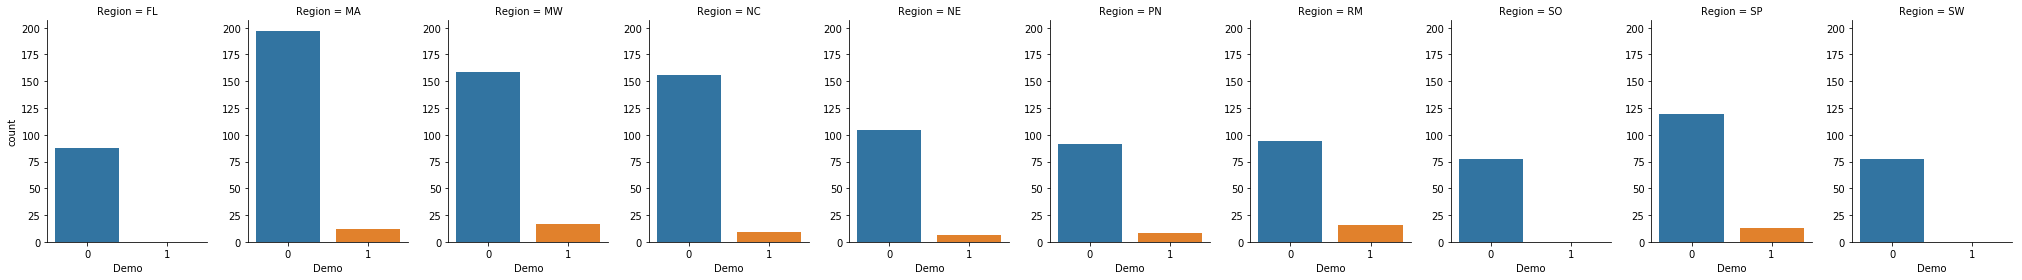

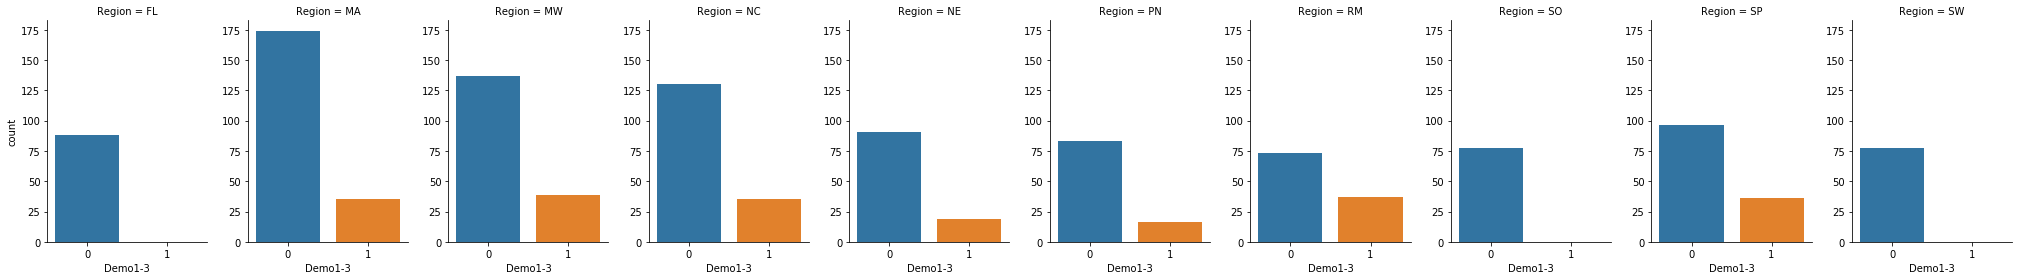

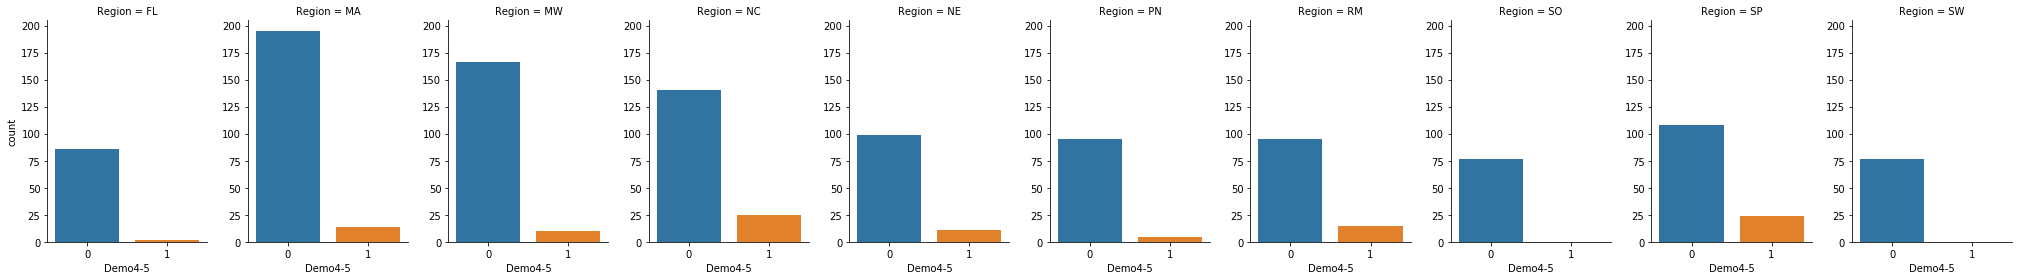

In [169]:
gSR = sns.factorplot(x="Sales_Rep", col="Region",
                   data=bellyfat, kind="count",
                   size=4, aspect=.7);
g = sns.factorplot(x="Demo", col="Region",
                   data=bellyfat, kind="count",
                   size=4, aspect=.7);
g13 = sns.factorplot(x="Demo1-3", col="Region",
                   data=bellyfat, kind="count",
                   size=4, aspect=.7);
g45 = sns.factorplot(x="Demo4-5", col="Region",
                   data=bellyfat, kind="count",
                   size=4, aspect=.7);

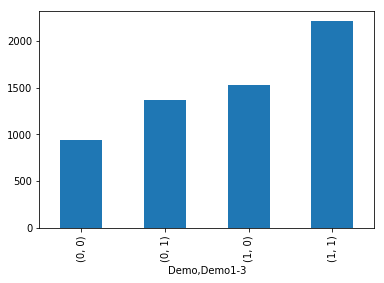

In [48]:
groupby_demo03 = bellyfat.groupby(['Demo','Demo1-3']).aggregate(np.mean)
groupby_demo03.Revenue.plot.bar()

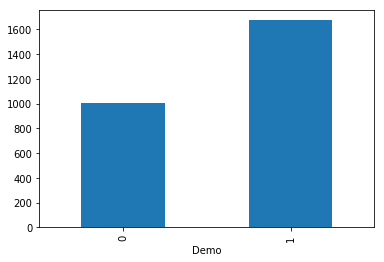

In [49]:
groupby_demo0 = bellyfat.groupby('Demo').aggregate(np.mean)
groupby_demo0.Revenue.plot.bar()

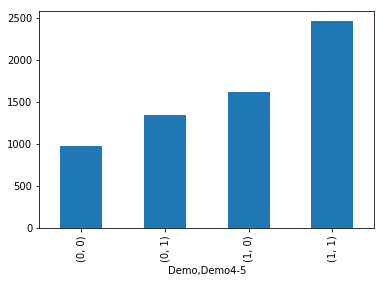

In [50]:
groupby_demo045 = bellyfat.groupby(['Demo','Demo4-5']).aggregate(np.mean)
groupby_demo045.Revenue.plot.bar()

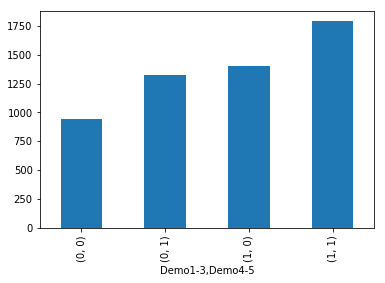

In [51]:
groupby_demo15 = bellyfat.groupby(['Demo1-3','Demo4-5']).aggregate(np.mean)
groupby_demo15.Revenue.plot.bar()

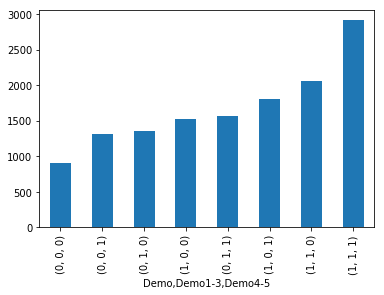

In [54]:
groupby_demo05 = bellyfat.groupby(['Demo','Demo1-3','Demo4-5']).aggregate(np.mean).sort_values("Revenue")
groupby_demo05.Revenue.plot.bar()

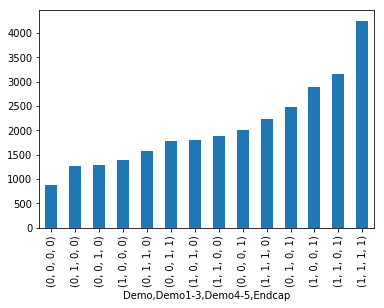

In [55]:
groupby_demo05_endcap = bellyfat.groupby(['Demo','Demo1-3','Demo4-5','Endcap']).aggregate(np.mean).sort_values("Revenue")
groupby_demo05_endcap.Revenue.plot.bar()

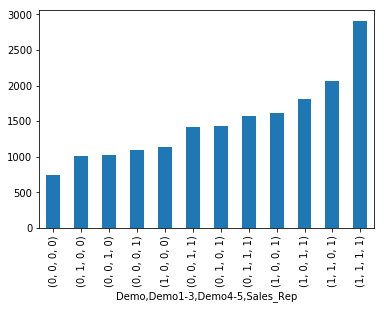

In [56]:
groupby_demo05_salerep = bellyfat.groupby(['Demo','Demo1-3','Demo4-5','Sales_Rep']).aggregate(np.mean).sort_values("Revenue")
groupby_demo05_salerep.Revenue.plot.bar()

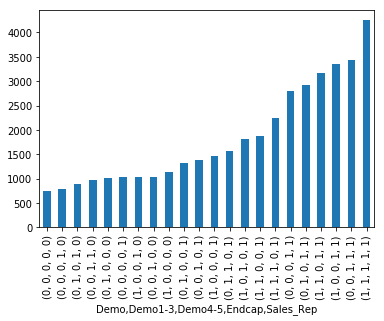

In [57]:
group_plot = group_by.aggregate(np.mean).sort_values("Revenue")
group_plot.Revenue.plot.bar()